Integrantes:
- Douglas Ardila Garcés
- Natalia Arias Lozano
- Andrés Felipe Avendaño
- Camila White Romero

# Punto 2

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.array([
    [0.8, 0.8],
    [0.8, 1.2],
    [3.8, 2.8],
    [4.2, 3.2],
    [1, 1],
    [1.2, 1.2],
    [4.2, 2.8],
    [4.4, 2.8],
    [3.5, 1],
    [4, 1],
    [3.8, 0.5],
    [4, 0.7]
])
y = np.array([
    [1],
    [1],
    [2],
    [2],
    [1],
    [1],
    [2],
    [2],
    [3],
    [3],
    [3],
    [3]
])

In [3]:
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y

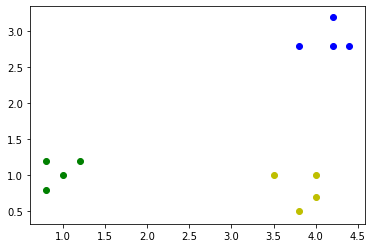

In [4]:
class_1 = df[df['y']==1]
class_2 = df[df['y']==2]
class_3 = df[df['y']==3]
plt.scatter(class_1['x1'], class_1['x2'], c='g', marker='o')
plt.scatter(class_2['x1'], class_2['x2'], c='b', marker='o')
plt.scatter(class_3['x1'], class_3['x2'], c='y', marker='o')

### 1. Calcule la precisión en el conjunto de entrenamiento.
### 2. Calcule la precisión para el punto de testeo P = (3.0, 2.0).
### 3. Experimenta con qué valor de k se obtinen la mejor precisión.


In [5]:
for i in range(2, 13, 2):
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    neigh.fit(X, y)
    score = neigh.score(X, y)
    predict = neigh.predict([[3,2]])
    print('\n--------------------', '\nn_neighbors:', i, '\nscore:', score, '\npredict p=[3,2]:', predict[0])


-------------------- 
n_neighbors: 2 
score: 1.0 
predict p=[3,2]: 2

-------------------- 
n_neighbors: 4 
score: 1.0 
predict p=[3,2]: 2

-------------------- 
n_neighbors: 6 
score: 1.0 
predict p=[3,2]: 2

-------------------- 
n_neighbors: 8 
score: 0.75 
predict p=[3,2]: 2

-------------------- 
n_neighbors: 10 
score: 0.6666666666666666 
predict p=[3,2]: 2

-------------------- 
n_neighbors: 12 
score: 0.3333333333333333 
predict p=[3,2]: 1


### 4. Vecinos más cercanos con distancia ponderada, Testear con el punto P(3, 2) tomando k = 1 y k = 5.

In [6]:
for i in [1, 5]:
    n_neighbors = i
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    neigh.fit(X, y)
    score = neigh.score(X, y)
    predict = neigh.predict([[3,2]])
    print('\n--------------------', '\nn_neighbors:', i, '\nscore:', score, '\npredict p=[3,2]:', predict[0])


-------------------- 
n_neighbors: 1 
score: 1.0 
predict p=[3,2]: 3

-------------------- 
n_neighbors: 5 
score: 1.0 
predict p=[3,2]: 2


In [7]:
df = df.append({'x1': 3, 'x2':2}, ignore_index=True)

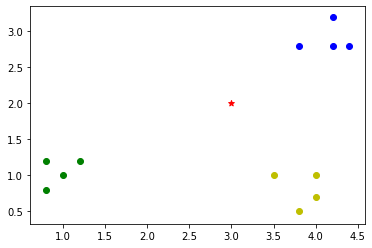

In [8]:
class_1 = df[df['y']==1]
class_2 = df[df['y']==2]
class_3 = df[df['y']==3]
new_point = df[df['x1']==3.0]
plt.scatter(class_1['x1'], class_1['x2'], c='g', marker='o')
plt.scatter(class_2['x1'], class_2['x2'], c='b', marker='o')
plt.scatter(class_3['x1'], class_3['x2'], c='y', marker='o')
plt.scatter(new_point['x1'], new_point['x2'], c='r', marker='*')

# Punto 3

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### 1. Implementar el algoritmo de clasificación KNN. Valide con los datos del problema 1 (el de calentamiento).

In [2]:
X = np.array([[0.8, 0.8], [0.8, 1.2], [3.8, 2.8], [4.2, 3.2], [1, 1], [1.2, 1.2], [4.2, 2.8], [4.4, 2.8], 
              [3.5, 1], [4, 1],[3.8, 0.5], [4, 0.7]])
Y = np.array([1, 1, 2, 2, 1, 1, 2, 2, 3, 3, 3, 3])

In [3]:
data = pd.DataFrame(X, columns=['x1', 'x2'])
data['y'] = Y
data.head()

,x1,x2,y
0,0.8,0.8,1
1,0.8,1.2,1
2,3.8,2.8,2
3,4.2,3.2,2
4,1.0,1.0,1


In [4]:
X = data[['x1', 'x2']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [6]:
predictions

array([2, 2, 1, 2])

In [7]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.25


### 2. Para este ejercicio use la base de datos DatosFisher.xlsx disponible en la página del curso.

In [8]:
dataFisher = pd.read_excel('DatosFisher.xlsx', skiprows=1)
dataFisher.head()

,sexo,estatura,peso,longitudpie,longitudbrazo,anchuraespalda,diametrocraneo,longitudrodillatobillo
0,0,159,49,36.0,68.0,42.0,57.0,40.0
1,1,164,62,39.0,73.0,44.0,55.0,44.0
2,0,172,65,38.0,75.0,48.0,58.0,44.0
3,1,167,52,37.0,73.0,41.5,58.0,44.0
4,1,164,51,36.0,71.0,44.5,54.0,40.0


In [9]:
X = dataFisher.drop(['sexo'], axis=1)
y = dataFisher['sexo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [11]:
predictions

array([1, 1, 0, 0, 0, 1, 0, 0, 0])

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7777777777777778


### 3. Seleccione el k para el cual el error de entrenamiento sea mínimo. k =?

In [13]:
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    print("Accuracy for", k, "is: ", metrics.accuracy_score(y_test, predictions))

Accuracy for 1 is:  0.8888888888888888
Accuracy for 2 is:  0.5555555555555556
Accuracy for 3 is:  0.6666666666666666
Accuracy for 4 is:  0.7777777777777778
Accuracy for 5 is:  0.8888888888888888
Accuracy for 6 is:  0.5555555555555556
Accuracy for 7 is:  0.7777777777777778
Accuracy for 8 is:  0.6666666666666666
Accuracy for 9 is:  0.8888888888888888


El k para el cual el error de entrenamiento es mínimo, es k=5.

# Punto 4

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('DatosFisher.xlsx', header=1)
df.head(3) # 0 mujer, 1 hombre

,sexo,estatura,peso,longitudpie,longitudbrazo,anchuraespalda,diametrocraneo,longitudrodillatobillo
0,0,159,49,36.0,68.0,42.0,57.0,40.0
1,1,164,62,39.0,73.0,44.0,55.0,44.0
2,0,172,65,38.0,75.0,48.0,58.0,44.0


In [3]:
train_errors = []
test_errors = []
train_size = []
for t_size in range(1, 10, 1):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['sexo']), df['sexo'], test_size=1-((t_size/10)), train_size=(t_size/10), random_state=42
    )
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    train_size.append(t_size*10)
    train_errors.append(1-clf.score(X_train, y_train))
    test_errors.append(1-clf.score(X_test, y_test))

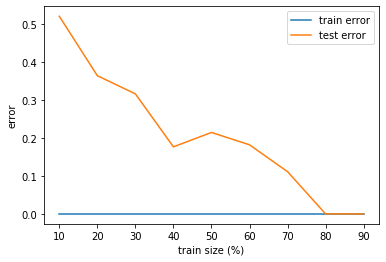

In [4]:
plt.plot(train_size, train_errors, label='train error')
plt.plot(train_size, test_errors, label='test error')
plt.xlabel('train size (%)')
plt.ylabel('error')
plt.legend()

### Hipotesis: Se puede apreciar que a medida que el tamaño del conjunto de entrenamiento crece, el score de entrenamiento no varia, esto se conoce como baja varianza. Tambien se puede ver que a medida que el tamaño del conjunto de entrenamiento crece, el error de testeo tiende a reducir y se va reduciendo la brecha entre el error de entrenamiento y el de testeo, lo cual nos indica que el clasificador logra generalizar mejor y dar mejores predicciones.

# Punto 5

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

In [2]:
data = pd.read_excel('ELE.xlsx', header=None)  
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,82.23,333.65,125.95,12231.27,1110.97,105069.63,263.66,77811.79,423.50,112743.19,823200.19,403.91,982.62,3955.22,19381.56,4324.97,125876.24
1,79.17,349.29,120.41,11977.18,1069.27,107210.46,261.29,69254.01,435.26,98112.25,705245.02,400.45,962.11,3946.92,17222.31,4262.06,111311.84
2,79.92,342.56,113.92,11712.42,997.68,108138.53,262.07,55266.32,422.36,84301.39,603368.98,392.59,944.62,3981.55,14876.55,4260.74,98425.38
3,75.83,299.48,163.12,11539.83,1003.56,110735.68,264.49,40753.72,419.72,75501.86,540643.37,383.81,928.89,3992.56,13453.31,4374.65,88527.77
4,78.72,268.19,119.30,11289.02,976.19,110619.01,262.18,54150.28,412.30,68409.14,499768.04,379.25,912.91,3941.43,12032.98,4357.31,81449.29


In [3]:
m = data.shape[0]
one = np.ones((m,1))

### 1. Estudiar el tipo de variable de manera univariante.

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,69.569167,266.415833,86.936250,12547.755000,1203.770417,113199.392500,235.588333,55842.805417,593.431667,82134.531250,599689.956250,601.732500,925.003750,2629.052083,14387.621667,3878.305000,102866.145000
std,8.134553,38.848184,33.739803,1236.273447,173.740257,5622.010113,26.054715,13653.273898,152.193128,19136.279173,134450.219602,180.540165,39.084121,1472.053564,2991.939096,777.095562,28673.141354
min,55.880000,214.260000,-0.360000,10437.330000,930.020000,105069.630000,204.570000,40753.720000,315.430000,54032.480000,431534.830000,379.250000,869.230000,946.110000,10894.730000,2876.350000,74031.670000
25%,63.225000,239.472500,72.347500,11619.532500,1055.085000,109235.005000,209.025000,46561.625000,423.215000,68393.597500,507572.630000,403.902500,894.130000,1220.525000,12634.757500,3203.535000,85085.770000
50%,69.100000,256.100000,92.630000,12668.045000,1242.570000,111255.150000,233.735000,51969.080000,653.685000,75912.280000,560832.480000,599.985000,925.985000,2636.155000,13177.435000,3752.750000,92409.750000
75%,76.920000,287.705000,106.532500,13383.467500,1358.237500,117980.042500,262.422500,59133.875000,698.725000,86368.270000,631338.452500,767.895000,954.780000,4014.565000,15462.990000,4437.942500,111634.527500
max,82.230000,349.290000,163.120000,14734.770000,1480.070000,123542.560000,267.300000,92492.590000,824.530000,131999.850000,903238.970000,862.310000,995.990000,4272.590000,21404.120000,5245.480000,174154.020000


Curtosis

In [5]:
kurtosis(data)

array([-1.33631823, -0.41679567,  0.83789888, -0.94935956, -1.34452428,
       -0.93677626, -1.83356592,  0.5090123 , -1.17579249,  0.43933698,
       -0.22841013, -1.60304349, -0.96607489, -1.97465921, -0.13484978,
       -1.46473807,  0.74873281])

Varianza

In [6]:
data.var()

0     6.617095e+01
1     1.509181e+03
2     1.138374e+03
3     1.528372e+06
4     3.018568e+04
5     3.160700e+07
6     6.788482e+02
7     1.864119e+08
8     2.316275e+04
9     3.661972e+08
10    1.807686e+10
11    3.259475e+04
12    1.527569e+03
13    2.166942e+06
14    8.951700e+06
15    6.038775e+05
16    8.221490e+08
dtype: float64

La mayoria de las variables presentan una dispersión alta, esto se puede identificar debido a que la variabilidad tiene una magnitud significativa y la curtosis es menor a 0; por lo tanto puede ocurrir poca concentración de datos en la media. 

Las variables del dataset se encuentran en diferentes escalas, lo cual puede afectar la precisión del modelo.

### 2. Calcular las medidas de centralización: el vector de medias.

Fórmula $\overline{X}=\frac{1}{m}X^t1$

In [7]:
media = np.dot(1/m,data.T).dot(one)
media.tolist()

[[69.56916666666666],
 [266.41583333333335],
 [86.93625],
 [12547.755],
 [1203.7704166666667],
 [113199.3925],
 [235.5883333333333],
 [55842.80541666666],
 [593.4316666666666],
 [82134.53125],
 [599689.9562499999],
 [601.7325],
 [925.0037499999999],
 [2629.052083333333],
 [14387.621666666666],
 [3878.3049999999994],
 [102866.14499999999]]

### 3. Calcular la matriz de varianzas y covarianzas.

Con fórmula
$$P=I-\frac{1}{m}11^t$$
$$S=\frac{1}{m}X^tPX$$

In [8]:
P = np.eye(m)-(np.dot((1/m),one).dot(one.T))

In [9]:
S = np.dot((1/m),data.T).dot(P).dot(data)
S

array([[ 6.34138243e+01,  1.29404734e+02,  1.31144168e+02,
        -1.36629752e+03, -3.77258783e+02, -2.29021056e+04,
         1.34331857e+02,  5.89271128e+04, -3.92280599e+02,
         7.47337229e+04,  4.79474939e+05, -8.22213360e+02,
         1.64663740e+01,  8.06172401e+03,  1.09356647e+04,
         3.42184255e+03,  8.71150158e+04],
       [ 1.29404734e+02,  1.44629882e+03,  6.93372184e+02,
        -1.17335569e+04, -2.63103951e+03, -8.67740787e+04,
         4.14540201e+02,  1.24167510e+04, -2.07486861e+03,
         2.51739810e+04,  4.92077451e+05, -2.80180583e+03,
         2.94765703e+02,  2.27405196e+04,  1.08248196e+04,
         9.18902297e+03, -8.07253657e+04],
       [ 1.31144168e+02,  6.93372184e+02,  1.09094205e+03,
        -1.30626252e+04, -2.83039529e+03, -7.46646008e+04,
         4.82355865e+02,  2.21221081e+04, -2.43781837e+03,
         2.91395534e+04,  3.95361424e+05, -3.82958840e+03,
         2.30770727e+02,  2.43992013e+04,  1.43979403e+04,
         1.03479591e+04, -1.8

### 4. Centralizar los datos y calcular la matriz de varianzas y covarianzas.

Con fórmula
$$\tilde{X}=X − 1\overline{X^t}$$
$$S=\frac{1}{m}\tilde{X^t}\tilde{X}$$

In [10]:
XCentrada = data-one.dot(media.T)

In [11]:
S = np.dot(1/m, XCentrada.T).dot(XCentrada)
S

array([[ 6.34138243e+01,  1.29404734e+02,  1.31144168e+02,
        -1.36629752e+03, -3.77258783e+02, -2.29021056e+04,
         1.34331857e+02,  5.89271128e+04, -3.92280599e+02,
         7.47337229e+04,  4.79474939e+05, -8.22213360e+02,
         1.64663740e+01,  8.06172401e+03,  1.09356647e+04,
         3.42184255e+03,  8.71150157e+04],
       [ 1.29404734e+02,  1.44629882e+03,  6.93372184e+02,
        -1.17335569e+04, -2.63103951e+03, -8.67740787e+04,
         4.14540201e+02,  1.24167510e+04, -2.07486861e+03,
         2.51739810e+04,  4.92077451e+05, -2.80180583e+03,
         2.94765703e+02,  2.27405196e+04,  1.08248196e+04,
         9.18902297e+03, -8.07253657e+04],
       [ 1.31144168e+02,  6.93372184e+02,  1.09094205e+03,
        -1.30626252e+04, -2.83039529e+03, -7.46646008e+04,
         4.82355865e+02,  2.21221081e+04, -2.43781837e+03,
         2.91395534e+04,  3.95361424e+05, -3.82958840e+03,
         2.30770727e+02,  2.43992013e+04,  1.43979403e+04,
         1.03479591e+04, -1.8

### 5. Calcular la variabilidad total y la varianza promedio.

In [18]:
diagonal = np.diag(S)

Varianza Total

In [20]:
sum(diagonal)

18684211389.65595

Varianza Promedio

In [22]:
(1/S.shape[1])*sum(diagonal)

1099071258.2150557

### 6. Calcule la varianza generalizada y la variabilidad promedio.

Varianza Generalizada

In [16]:
VG = np.linalg.det(S)
VG

5.525955295973817e+77

Variabilidad Promedio

In [23]:
VP = VG**(1/S.shape[1])
VP

37418.19089716665

### 7. Distancia de Mahalanobis Se define la distancia de Mahalanobis entre un punto y su vector de medias como

In [ ]:
from scipy.spatial import distance

In [ ]:
mahal = []
for i in range(0, m-1):
    mahal.append(distance.mahalanobis(data.iloc[[i]], media, np.linalg.inv(S)))

mahal

# Punto 6

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import linear_model
from scipy import stats
import pingouin as pg

In [2]:
df = pd.read_excel('ELE.xlsx', header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,82.23,333.65,125.95,12231.27,1110.97,105069.63,263.66,77811.79,423.50,112743.19,823200.19,403.91,982.62,3955.22,19381.56,4324.97,125876.24
1,79.17,349.29,120.41,11977.18,1069.27,107210.46,261.29,69254.01,435.26,98112.25,705245.02,400.45,962.11,3946.92,17222.31,4262.06,111311.84
2,79.92,342.56,113.92,11712.42,997.68,108138.53,262.07,55266.32,422.36,84301.39,603368.98,392.59,944.62,3981.55,14876.55,4260.74,98425.38


In [3]:
fig = px.scatter_matrix(df, width=1500, height=1500)
fig.show()

### 1. Analizar la correlación entre pares de variables

Se puede apreciar que hay varias correlaciones que se aproximan a 1 y a -1, lo que nos indica que ese par de variables tienen una alta correlacion lineal

In [6]:
corr = df.corr(method ='pearson').style.background_gradient(cmap='coolwarm').set_precision(2)
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.00,0.43,0.50,-0.14,-0.28,-0.52,0.66,0.55,-0.33,0.50,0.46,-0.58,0.05,0.70,0.47,0.56,0.39
1,0.43,1.00,0.55,-0.25,-0.41,-0.41,0.43,0.02,-0.37,0.04,0.10,-0.42,0.20,0.41,0.10,0.32,-0.08
2,0.50,0.55,1.00,-0.33,-0.50,-0.41,0.57,0.05,-0.50,0.05,0.09,-0.66,0.18,0.51,0.15,0.41,-0.02
3,-0.14,-0.25,-0.33,1.00,0.86,0.37,0.08,0.50,0.72,0.56,0.70,0.39,-0.29,0.18,0.61,0.32,0.74
4,-0.28,-0.41,-0.50,0.86,1.00,0.68,-0.35,0.39,0.85,0.49,0.53,0.70,-0.05,-0.21,0.43,-0.07,0.61
5,-0.52,-0.41,-0.41,0.37,0.68,1.00,-0.74,-0.25,0.57,-0.13,-0.15,0.82,0.39,-0.67,-0.26,-0.59,-0.07
6,0.66,0.43,0.57,0.08,-0.35,-0.74,1.00,0.42,-0.28,0.32,0.46,-0.83,-0.34,0.96,0.48,0.92,0.37
7,0.55,0.02,0.05,0.50,0.39,-0.25,0.42,1.00,0.17,0.95,0.92,-0.19,-0.09,0.53,0.92,0.49,0.91
8,-0.33,-0.37,-0.50,0.72,0.85,0.57,-0.28,0.17,1.00,0.26,0.34,0.67,-0.26,-0.18,0.23,0.02,0.39
9,0.50,0.04,0.05,0.56,0.49,-0.13,0.32,0.95,0.26,1.00,0.95,-0.05,-0.06,0.43,0.95,0.39,0.93


### 2. Análizar dependecia entre una variable y todas las demás. En este caso encontrar las betas de la regresión múltiple de la variable que mejor se puede explicar a partir de las demás.



In [7]:
def matriz_P(x):
    """
    La matriz P es cuadrada simétrica e idempotente ()PP = P)
    Tiene rango (m-1) es ortogonal al espacio definido por el vector 1 ya que P*1 = 0 y proyecta los
    datos ortogonalmente al espacio deÞnido por el vector constante
    """
    xx = np.array(x)
    m,n = xx.shape
    unos = np.ones([m,1])
    Identidad = np.identity(m)
    P = Identidad - float(1.0/m) * unos.dot(unos.T)
    return P

def Matriz_covarianzasCorregida(x):
    """
    matriz de covarianzas a partir de los datos. OBSERVE que se divide por (n-1)
    np.cov(Data, rowvar=False) # esta funcion me da la covarianza corregida
    """
    xx = np.array(x)
    m,n = xx.shape
    P = matriz_P(x)
    intermedio =P.dot(xx)
    S = float(1.0/(m-1))*(xx.T.dot(intermedio))
    return S
s_jj__jj = np.diag(Matriz_covarianzasCorregida(df))*np.diag(np.linalg.inv(Matriz_covarianzasCorregida(df))).round(4)

#### Variable con mayor correlación múltiple

In [8]:
R2 = 1 - 1/s_jj__jj
R2 = list(R2.round(4))
print("La variable que mejor se explica a partir de las demas es la", R2.index(max(R2)))

La variable que mejor se explica a partir de las demas es la 4


#### Parámetros de la regresión lineal múltiple de la variable con el resto

In [9]:
X = df.drop(columns=[4])
X['unos'] = 1
Y = df[4]
betas = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
betas

array([-3.77894895e-01, -9.05118155e-02, -4.69805924e-01,  1.29356546e-02,
        1.35074945e-02, -1.99159248e+00, -1.25645662e-03,  5.42446745e-02,
       -2.31968624e-04,  1.19949076e-03, -1.63896511e-02, -4.66975704e-01,
       -3.71492772e-02, -1.69051634e-02,  8.03967165e-02,  6.38030201e-04,
       -1.84162569e+02])

### 3. Analizar la correlacion entre pares de variables pero eliminando el efecto de las demás variables.

Se puede apreciar que hay varias correlaciones que se aproximan a 1 y a -1, lo que nos indica que ese par de variables tienen una alta correlacion lineal

In [10]:
def calculate_partial_correlation(input_df):
    """
    Returns the sample linear partial correlation coefficients between pairs of variables,
    controlling for all other remaining variables

    Parameters
    ----------
    input_df : array-like, shape (n, p)
        Array with the different variables. Each column is taken as a variable.

    Returns
    -------
    P : array-like, shape (p, p)
        P[i, j] contains the partial correlation of input_df[:, i] and input_df[:, j]
        controlling for all other remaining variables.
    """
    partial_corr_matrix = np.zeros((input_df.shape[1], input_df.shape[1]));
    for i, column1 in enumerate(input_df):
        for j, column2 in enumerate(input_df):
            control_variables = np.delete(np.arange(input_df.shape[1]), [i, j]);
            if i==j:
                partial_corr_matrix[i, j] = 1;
                continue
            data_control_variable = input_df.iloc[:, control_variables]
            data_column1 = input_df[column1].values
            data_column2 = input_df[column2].values
            fit1 = linear_model.LinearRegression(fit_intercept=True)
            fit2 = linear_model.LinearRegression(fit_intercept=True)
            fit1.fit(data_control_variable, data_column1)
            fit2.fit(data_control_variable, data_column2)
            residual1 = data_column1 - (np.dot(data_control_variable, fit1.coef_) + fit1.intercept_)
            residual2 = data_column2 - (np.dot(data_control_variable, fit2.coef_) + fit2.intercept_)
            partial_corr_matrix[i,j] = stats.pearsonr(residual1, residual2)[0]
    return pd.DataFrame(partial_corr_matrix, columns = input_df.columns, index = input_df.columns)

In [11]:
partial_corr1 = df.pcorr().round(2)
partial_corr = calculate_partial_correlation(df).style.background_gradient(cmap='coolwarm').set_precision(2)
partial_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.00,-0.41,-0.64,-0.87,-0.06,0.60,0.49,0.02,-0.66,-0.20,0.21,0.85,-0.13,0.49,0.41,0.14,-0.24
1,-0.41,1.00,-0.20,-0.37,-0.16,0.23,-0.02,-0.22,-0.34,-0.12,0.38,0.56,0.02,0.37,0.08,0.10,-0.42
2,-0.64,-0.20,1.00,-0.70,-0.38,0.86,0.16,-0.26,-0.42,-0.33,0.34,0.50,-0.36,0.27,0.52,0.31,-0.15
3,-0.87,-0.37,-0.70,1.00,0.12,0.59,0.59,0.03,-0.68,-0.44,0.16,0.81,-0.20,0.58,0.59,-0.03,-0.27
4,-0.06,-0.16,-0.38,0.12,1.00,0.65,-0.55,-0.34,0.19,-0.04,0.76,-0.03,-0.53,-0.38,-0.33,0.56,0.24
5,0.60,0.23,0.86,0.59,0.65,1.00,0.03,0.19,0.34,0.34,-0.61,-0.43,0.66,-0.12,-0.28,-0.40,0.10
6,0.49,-0.02,0.16,0.59,-0.55,0.03,1.00,-0.26,0.49,0.08,0.34,-0.54,-0.24,-0.21,-0.30,0.21,-0.04
7,0.02,-0.22,-0.26,0.03,-0.34,0.19,-0.26,1.00,-0.06,0.37,0.32,-0.07,-0.07,-0.23,-0.18,0.40,0.09
8,-0.66,-0.34,-0.42,-0.68,0.19,0.34,0.49,-0.06,1.00,0.03,0.09,0.71,-0.09,0.23,0.26,0.30,-0.36
9,-0.20,-0.12,-0.33,-0.44,-0.04,0.34,0.08,0.37,0.03,1.00,0.26,0.23,-0.30,0.50,0.43,-0.47,0.03


### 4. Analizar el conjunto completo de todas las variables.

Matriz de precisión: contiene la información sobre la relación multivariante entrecada una de las variables y el resto

In [12]:
cov = np.cov(df, rowvar=False)
cov_inv = np.linalg.inv(cov)
df_cov_inv = pd.DataFrame(cov_inv).style.set_precision(2)
df_cov_inv 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.44,0.02,0.05,0.01,0.00,-0.00,-0.12,-0.00,0.01,0.00,-0.00,-0.03,0.01,-0.00,-0.00,-0.00,0.00
1,0.02,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
2,0.05,0.00,0.02,0.00,0.00,-0.00,-0.01,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
3,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
4,0.00,0.00,0.00,-0.00,0.01,-0.00,0.02,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
5,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
6,-0.12,0.00,-0.01,-0.00,0.02,-0.00,0.13,0.00,-0.01,-0.00,-0.00,0.01,0.01,0.00,0.00,-0.00,0.00
7,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
8,0.01,0.00,0.00,0.00,-0.00,-0.00,-0.01,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00


# Punto 7

In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [15]:
data = pd.read_excel('ELE.xlsx', header=None)  
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,82.23,333.65,125.95,12231.27,1110.97,105069.63,263.66,77811.79,423.50,112743.19,823200.19,403.91,982.62,3955.22,19381.56,4324.97,125876.24
1,79.17,349.29,120.41,11977.18,1069.27,107210.46,261.29,69254.01,435.26,98112.25,705245.02,400.45,962.11,3946.92,17222.31,4262.06,111311.84
2,79.92,342.56,113.92,11712.42,997.68,108138.53,262.07,55266.32,422.36,84301.39,603368.98,392.59,944.62,3981.55,14876.55,4260.74,98425.38
3,75.83,299.48,163.12,11539.83,1003.56,110735.68,264.49,40753.72,419.72,75501.86,540643.37,383.81,928.89,3992.56,13453.31,4374.65,88527.77
4,78.72,268.19,119.30,11289.02,976.19,110619.01,262.18,54150.28,412.30,68409.14,499768.04,379.25,912.91,3941.43,12032.98,4357.31,81449.29


In [16]:
data_scaled = preprocessing.scale(data)
data = pd.DataFrame(data_scaled)
data.columns = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16']
data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16
0,1.589902,1.767913,1.181182,-0.261505,-0.545621,-1.477161,1.100585,1.643671,-1.140567,1.633911,1.698156,-1.119292,1.505866,0.920273,1.705030,0.587150,0.819756
1,1.205638,2.179165,1.013453,-0.471455,-0.790797,-1.088177,1.007666,1.003397,-1.061635,0.852902,0.801972,-1.138869,0.969814,0.914513,0.967819,0.504454,0.300886
2,1.299820,2.002201,0.816961,-0.690220,-1.211711,-0.919548,1.038247,-0.043131,-1.148219,0.115668,0.027952,-1.183342,0.512693,0.938544,0.166930,0.502719,-0.158206
3,0.786213,0.869418,2.306543,-0.832828,-1.177139,-0.447652,1.133126,-1.128932,-1.165939,-0.354057,-0.448616,-1.233019,0.101572,0.946184,-0.318993,0.652456,-0.510818
4,1.149129,0.046651,0.979846,-1.040067,-1.338062,-0.468850,1.042560,-0.126631,-1.215741,-0.732671,-0.759173,-1.258820,-0.316084,0.910703,-0.803922,0.629662,-0.762996


In [17]:
data.describe()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16
count,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,6.221875e-16,8.511710e-16,-5.111652e-16,7.147061e-16,9.390636e-16,-5.181041e-16,-1.184238e-15,-2.960595e-16,-3.411623e-16,5.551115e-17,4.949744e-16,-4.348374e-16,8.234154e-16,-1.017704e-16,-3.885781e-16,1.202742e-16,-1.619075e-16
std,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00,1.021508e+00
min,-1.719036e+00,-1.371431e+00,-2.642985e+00,-1.743802e+00,-1.609519e+00,-1.477161e+00,-1.216113e+00,-1.128932e+00,-1.865924e+00,-1.500107e+00,-1.277586e+00,-1.258820e+00,-1.457710e+00,-1.167851e+00,-1.192543e+00,-1.317090e+00,-1.027256e+00
25%,-7.966776e-01,-7.084714e-01,-4.416897e-01,-7.669715e-01,-8.741976e-01,-7.203212e-01,-1.041449e+00,-6.943974e-01,-1.142480e+00,-7.335006e-01,-6.998767e-01,-1.119335e+00,-8.069205e-01,-9.774247e-01,-5.984629e-01,-8.869988e-01,-6.334427e-01
50%,-5.891626e-02,-2.712535e-01,1.723842e-01,9.939320e-02,2.281226e-01,-3.532649e-01,-7.266226e-02,-2.898236e-01,4.044154e-01,-3.321481e-01,-2.952261e-01,-9.887467e-03,2.564608e-02,4.928955e-03,-4.131819e-01,-1.650446e-01,-3.725190e-01
75%,9.230912e-01,5.597958e-01,5.932970e-01,6.905324e-01,9.081910e-01,8.686344e-01,1.052067e+00,2.462306e-01,7.067202e-01,2.259999e-01,2.404547e-01,9.401581e-01,7.782361e-01,9.614543e-01,3.671523e-01,7.356548e-01,3.123819e-01
max,1.589902e+00,2.179165e+00,2.306543e+00,1.807086e+00,1.624507e+00,1.879333e+00,1.243296e+00,2.742056e+00,1.551113e+00,2.661845e+00,2.306264e+00,1.474364e+00,1.855306e+00,1.140507e+00,2.395573e+00,1.797179e+00,2.539698e+00


In [18]:
indexes = data[(data['col4'] >= -1.60) & (data['col4'] <= -1.19)].index

In [19]:
data.loc[(data['col4'] >= -1.61) & (data['col4'] <= -0.785), 'y'] = 0
data.loc[(data['col4'] > -0.785) & (data['col4'] <= 0.438), 'y'] = 1
data.loc[(data['col4'] > -0.03) & (data['col4'] <= 0.845), 'y'] = 2
data.loc[(data['col4'] > 0.845) & (data['col4'] <= 1.66), 'y'] = 3
data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,y
0,1.589902,1.767913,1.181182,-0.261505,-0.545621,-1.477161,1.100585,1.643671,-1.140567,1.633911,1.698156,-1.119292,1.505866,0.920273,1.705030,0.587150,0.819756,1.0
1,1.205638,2.179165,1.013453,-0.471455,-0.790797,-1.088177,1.007666,1.003397,-1.061635,0.852902,0.801972,-1.138869,0.969814,0.914513,0.967819,0.504454,0.300886,0.0
2,1.299820,2.002201,0.816961,-0.690220,-1.211711,-0.919548,1.038247,-0.043131,-1.148219,0.115668,0.027952,-1.183342,0.512693,0.938544,0.166930,0.502719,-0.158206,0.0
3,0.786213,0.869418,2.306543,-0.832828,-1.177139,-0.447652,1.133126,-1.128932,-1.165939,-0.354057,-0.448616,-1.233019,0.101572,0.946184,-0.318993,0.652456,-0.510818,0.0
4,1.149129,0.046651,0.979846,-1.040067,-1.338062,-0.468850,1.042560,-0.126631,-1.215741,-0.732671,-0.759173,-1.258820,-0.316084,0.910703,-0.803922,0.629662,-0.762996,0.0


In [20]:
X = data.drop(['col4', 'y'], axis=1)
y = data['y'].astype(int) #Según el punto 6 es la variable más explicada por las demás

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [22]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
predicts = clf.predict(X_test)

In [23]:
print("Accuracy Test:",accuracy_score(y_test, predicts))

Accuracy Test: 0.75


In [24]:
predicts = clf.predict(X_train)
print("Accuracy Train:",accuracy_score(y_train, predicts))

Accuracy Train: 1.0


Se pueden borrar las siguientes variables:
- columna 4. 
- columna 6.
- columna 7.
- columna 14.
- columna 16.

In [25]:
X = data.drop(['col4', 'y','col4','col6','col7','col14', 'col16'], axis=1)
y = data['y'].astype(int) #Según el punto 6 es la variable más explicada por las demás

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [27]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
predicts = clf.predict(X_test)

In [28]:
print("Accuracy Test:",metrics.accuracy_score(y_test, predicts))

Accuracy Test: 0.75


In [29]:
predicts = clf.predict(X_train)
print("Accuracy Train:",accuracy_score(y_train, predicts))

Accuracy Train: 1.0


# Punto 8